In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import sys
print(sys.version)

3.6.7 (v3.6.7:6ec5cf24b7, Oct 20 2018, 03:02:14) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [3]:
def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def normalization(train):
    feature_scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(feature_scaler.fit_transform(train.values), columns=train.columns, index=train.index)
    return X_scaled

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



train_pure=pd.read_csv('train.csv',sep=',',index_col=0)
x_pure= train_pure.drop('fraud',axis=1)
y_pure= train_pure['fraud']

x_train, x_holdout, y_train, y_holdout = train_test_split(x_pure, y_pure, test_size=0.2, random_state=324)

x_train= normalization(x_train)
x_holdout= normalization(x_holdout)

Using TensorFlow backend.


## Logistic regression 

In [6]:
attr_dim= x_holdout.shape[1]
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=attr_dim))
model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, nb_epoch=256, validation_data=(x_holdout, y_holdout),verbose=1)


y_pred = model.predict(x_holdout).astype(int)
validation_cost= my_custom_loss_func(y_holdout,y_pred)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1503 samples, validate on 376 samples
Epoch 1/256


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


1503/1503 [==============================] - 0s 120us/step - loss: 0.7980 - acc: 0.1124 - val_loss: 0.7359 - val_acc: 0.2527
Epoch 2/256
1503/1503 [==============================] - 0s 25us/step - loss: 0.6916 - acc: 0.5223 - val_loss: 0.6431 - val_acc: 0.8298
Epoch 3/256
1503/1503 [==============================] - 0s 24us/step - loss: 0.6008 - acc: 0.9128 - val_loss: 0.5618 - val_acc: 0.9335
Epoch 4/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.5223 - acc: 0.9474 - val_loss: 0.4933 - val_acc: 0.9335
Epoch 5/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.4561 - acc: 0.9474 - val_loss: 0.4362 - val_acc: 0.9335
Epoch 6/256
1503/1503 [==============================] - 0s 24us/step - loss: 0.4002 - acc: 0.9474 - val_loss: 0.3886 - val_acc: 0.9335
Epoch 7/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.3539 - acc: 0.9474 - val_loss: 0.3508 - val_acc: 0.9335
Epoch 8/256
1503/1503 [==============================] - 0s

Epoch 61/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.1450 - acc: 0.9474 - val_loss: 0.1848 - val_acc: 0.9335
Epoch 62/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1440 - acc: 0.9474 - val_loss: 0.1838 - val_acc: 0.9335
Epoch 63/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1431 - acc: 0.9474 - val_loss: 0.1828 - val_acc: 0.9335
Epoch 64/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1421 - acc: 0.9474 - val_loss: 0.1819 - val_acc: 0.9335
Epoch 65/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1412 - acc: 0.9474 - val_loss: 0.1808 - val_acc: 0.9335
Epoch 66/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1402 - acc: 0.9474 - val_loss: 0.1797 - val_acc: 0.9335
Epoch 67/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1393 - acc: 0.9474 - val_loss: 0.1788 - val_acc: 0.9335
Epoch 68/256
1503/1503 [=================

1503/1503 [==============================] - 0s 23us/step - loss: 0.1057 - acc: 0.9474 - val_loss: 0.1435 - val_acc: 0.9335
Epoch 121/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.1053 - acc: 0.9474 - val_loss: 0.1431 - val_acc: 0.9335
Epoch 122/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.1048 - acc: 0.9474 - val_loss: 0.1426 - val_acc: 0.9335
Epoch 123/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1044 - acc: 0.9474 - val_loss: 0.1421 - val_acc: 0.9335
Epoch 124/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1040 - acc: 0.9474 - val_loss: 0.1416 - val_acc: 0.9335
Epoch 125/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.1035 - acc: 0.9474 - val_loss: 0.1411 - val_acc: 0.9335
Epoch 126/256
1503/1503 [==============================] - 0s 22us/step - loss: 0.1031 - acc: 0.9481 - val_loss: 0.1406 - val_acc: 0.9335
Epoch 127/256
1503/1503 [=======================

1503/1503 [==============================] - 0s 22us/step - loss: 0.0867 - acc: 0.9587 - val_loss: 0.1230 - val_acc: 0.9415
Epoch 180/256
1503/1503 [==============================] - 0s 24us/step - loss: 0.0865 - acc: 0.9587 - val_loss: 0.1227 - val_acc: 0.9415
Epoch 181/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0862 - acc: 0.9587 - val_loss: 0.1224 - val_acc: 0.9415
Epoch 182/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0860 - acc: 0.9587 - val_loss: 0.1221 - val_acc: 0.9415
Epoch 183/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0858 - acc: 0.9601 - val_loss: 0.1219 - val_acc: 0.9415
Epoch 184/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0856 - acc: 0.9594 - val_loss: 0.1217 - val_acc: 0.9415
Epoch 185/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0853 - acc: 0.9601 - val_loss: 0.1214 - val_acc: 0.9415
Epoch 186/256
1503/1503 [=======================

1503/1503 [==============================] - 0s 23us/step - loss: 0.0759 - acc: 0.9760 - val_loss: 0.1110 - val_acc: 0.9495
Epoch 239/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0757 - acc: 0.9760 - val_loss: 0.1108 - val_acc: 0.9495
Epoch 240/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0756 - acc: 0.9767 - val_loss: 0.1107 - val_acc: 0.9495
Epoch 241/256
1503/1503 [==============================] - 0s 24us/step - loss: 0.0755 - acc: 0.9767 - val_loss: 0.1106 - val_acc: 0.9495
Epoch 242/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0753 - acc: 0.9754 - val_loss: 0.1104 - val_acc: 0.9495
Epoch 243/256
1503/1503 [==============================] - 0s 23us/step - loss: 0.0752 - acc: 0.9767 - val_loss: 0.1102 - val_acc: 0.9495
Epoch 244/256
1503/1503 [==============================] - 0s 24us/step - loss: 0.0751 - acc: 0.9767 - val_loss: 0.1100 - val_acc: 0.9521
Epoch 245/256
1503/1503 [=======================

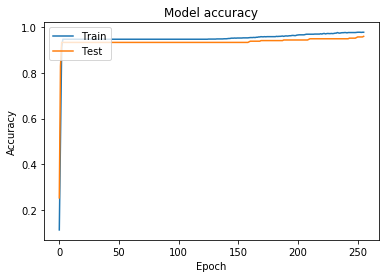

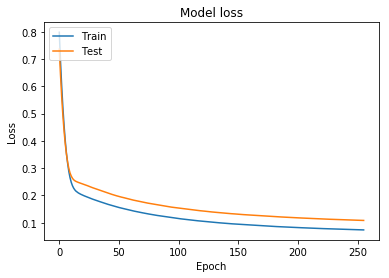

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
y_pred = model.predict(x_holdout).astype(int)
validation_accuracy= my_custom_loss_func(y_holdout,y_pred)

[[351   0]
 [ 25   0]]


## Logistic regression with hyper-parameter tuning

In [10]:
from keras.optimizers import Adam
from keras.regularizers import l1_l2
cost=[]
val_cost=[]
num_iters = [50,500]
best_val = -100
regularization_strengths = [1e-1,1e1,1e2, 1e3, 1e4, 1e5]
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
for l_rate in learning_rates:
    for r in regularization_strengths:
        for iterations in num_iters:
            reg = l1_l2(l1=r, l2=r)
            model = Sequential()
            model.add(Dense(1, activation='sigmoid', W_regularizer=reg, input_dim=attr_dim))
            opt= Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
            model.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])
            history=model.fit(x_train, y_train, nb_epoch=iterations,  batch_size=256,validation_data=(x_holdout, y_holdout))
           
            y_pred = model.predict(x_holdout).astype(int)
            validation_cost= my_custom_loss_func(y_holdout,y_pred)
            val_cost.append(validation_cost)
            
            y_pred = model.predict(x_train).astype(int)
            train_cost= my_custom_loss_func(y_train,y_pred)
            cost.append(train_cost)
            
            if validation_cost > best_val:
                best_cost= cost
                best_val_cost = val_cost
                best_history=history
                best_reg=r
                best_iter=iterations
                best_lr=l_rate
                best_val = validation_cost 
                best_model = model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=20, kernel_regularizer=<keras.reg...)`
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1503 samples, validate on 376 samples
Epoch 1/50
1503/1503 [==============================] - 0s 140us/step - loss: 1.2533 - acc: 0.8989 - val_loss: 1.1653 - val_acc: 0.9176
Epoch 2/50
1503/1503 [==============================] - 0s 6us/step - loss: 1.1060 - acc: 0.9401 - val_loss: 1.0348 - val_acc: 0.9309
Epoch 3/50
1503/1503 [==============================] - 0s 7us/step - loss: 0.9761 - acc: 0.9461 - val_loss: 0.9137 - val_acc: 0.9335
Epoch 4/50
1503/1503 [==============================] - 0s 7us/step - loss: 0.8605 - acc: 0.9474 - val_loss: 0.8094 - val_acc: 0.9335
Epoch 5/50
1503/1503 [==============================] - 0s 7us/step - loss: 0.7638 - acc: 0.9474 - val_loss: 0.7264 - val_acc: 0.9335
Epoch 6/50
1503/1503 [==============================] - 0s 6us/step - loss: 0.6880 - acc: 0.9474 - val_loss: 0.6583 - val_acc: 0.9335
Epoch 7/50
1503/1503 [==============================] - 0s 7us/step - loss: 0.6199 - acc: 0.9474 - val_loss: 0.5939 - val_acc: 0.9335
Epoch 8/50
15

1503/1503 [==============================] - 0s 7us/step - loss: 0.5004 - acc: 0.9474 - val_loss: 0.5093 - val_acc: 0.9335
Epoch 11/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.4900 - acc: 0.9474 - val_loss: 0.4962 - val_acc: 0.9335
Epoch 12/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.4739 - acc: 0.9474 - val_loss: 0.4771 - val_acc: 0.9335
Epoch 13/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.4580 - acc: 0.9474 - val_loss: 0.4677 - val_acc: 0.9335
Epoch 14/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.4483 - acc: 0.9474 - val_loss: 0.4544 - val_acc: 0.9335
Epoch 15/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.4363 - acc: 0.9474 - val_loss: 0.4443 - val_acc: 0.9335
Epoch 16/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.4253 - acc: 0.9474 - val_loss: 0.4348 - val_acc: 0.9335
Epoch 17/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 5us/step - loss: 0.2196 - acc: 0.9474 - val_loss: 0.2514 - val_acc: 0.9335
Epoch 71/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2194 - acc: 0.9474 - val_loss: 0.2516 - val_acc: 0.9335
Epoch 72/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2188 - acc: 0.9474 - val_loss: 0.2508 - val_acc: 0.9335
Epoch 73/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2180 - acc: 0.9474 - val_loss: 0.2499 - val_acc: 0.9335
Epoch 74/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2175 - acc: 0.9474 - val_loss: 0.2501 - val_acc: 0.9335
Epoch 75/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2170 - acc: 0.9474 - val_loss: 0.2494 - val_acc: 0.9335
Epoch 76/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2163 - acc: 0.9474 - val_loss: 0.2489 - val_acc: 0.9335
Epoch 77/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 5us/step - loss: 0.2088 - acc: 0.9474 - val_loss: 0.2470 - val_acc: 0.9335
Epoch 131/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2088 - acc: 0.9474 - val_loss: 0.2469 - val_acc: 0.9335
Epoch 132/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2085 - acc: 0.9474 - val_loss: 0.2474 - val_acc: 0.9335
Epoch 133/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2086 - acc: 0.9474 - val_loss: 0.2472 - val_acc: 0.9335
Epoch 134/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2468 - val_acc: 0.9335
Epoch 135/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2082 - acc: 0.9474 - val_loss: 0.2469 - val_acc: 0.9335
Epoch 136/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2471 - val_acc: 0.9335
Epoch 137/500
1503/1503 [==============================

Epoch 190/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2083 - acc: 0.9474 - val_loss: 0.2483 - val_acc: 0.9335
Epoch 191/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 192/500
1503/1503 [==============================] - 0s 4us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2481 - val_acc: 0.9335
Epoch 193/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2086 - acc: 0.9474 - val_loss: 0.2483 - val_acc: 0.9335
Epoch 194/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2478 - val_acc: 0.9335
Epoch 195/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2080 - acc: 0.9474 - val_loss: 0.2479 - val_acc: 0.9335
Epoch 196/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2079 - acc: 0.9474 - val_loss: 0.2479 - val_acc: 0.9335
Epoch 197/500
1503/1503 [================

Epoch 250/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2083 - acc: 0.9474 - val_loss: 0.2484 - val_acc: 0.9335
Epoch 251/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2082 - acc: 0.9474 - val_loss: 0.2489 - val_acc: 0.9335
Epoch 252/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2488 - val_acc: 0.9335
Epoch 253/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2085 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 254/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2484 - val_acc: 0.9335
Epoch 255/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2085 - acc: 0.9474 - val_loss: 0.2490 - val_acc: 0.9335
Epoch 256/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 257/500
1503/1503 [================

Epoch 310/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2085 - acc: 0.9474 - val_loss: 0.2489 - val_acc: 0.9335
Epoch 311/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2080 - acc: 0.9474 - val_loss: 0.2481 - val_acc: 0.9335
Epoch 312/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2484 - val_acc: 0.9335
Epoch 313/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2086 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 314/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2086 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 315/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2087 - acc: 0.9474 - val_loss: 0.2488 - val_acc: 0.9335
Epoch 316/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2082 - acc: 0.9474 - val_loss: 0.2484 - val_acc: 0.9335
Epoch 317/500
1503/1503 [================

Epoch 370/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2080 - acc: 0.9474 - val_loss: 0.2486 - val_acc: 0.9335
Epoch 371/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2085 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 372/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2481 - val_acc: 0.9335
Epoch 373/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2486 - val_acc: 0.9335
Epoch 374/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2083 - acc: 0.9474 - val_loss: 0.2486 - val_acc: 0.9335
Epoch 375/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2086 - acc: 0.9474 - val_loss: 0.2482 - val_acc: 0.9335
Epoch 376/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2087 - acc: 0.9474 - val_loss: 0.2481 - val_acc: 0.9335
Epoch 377/500
1503/1503 [================

Epoch 430/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2087 - acc: 0.9474 - val_loss: 0.2488 - val_acc: 0.9335
Epoch 431/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2480 - val_acc: 0.9335
Epoch 432/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2079 - acc: 0.9474 - val_loss: 0.2479 - val_acc: 0.9335
Epoch 433/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2079 - acc: 0.9474 - val_loss: 0.2490 - val_acc: 0.9335
Epoch 434/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2083 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 435/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2082 - acc: 0.9474 - val_loss: 0.2485 - val_acc: 0.9335
Epoch 436/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2487 - val_acc: 0.9335
Epoch 437/500
1503/1503 [================

Epoch 490/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2491 - val_acc: 0.9335
Epoch 491/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2086 - acc: 0.9474 - val_loss: 0.2481 - val_acc: 0.9335
Epoch 492/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2485 - val_acc: 0.9335
Epoch 493/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2084 - acc: 0.9474 - val_loss: 0.2486 - val_acc: 0.9335
Epoch 494/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.2082 - acc: 0.9474 - val_loss: 0.2483 - val_acc: 0.9335
Epoch 495/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2481 - val_acc: 0.9335
Epoch 496/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.2081 - acc: 0.9474 - val_loss: 0.2478 - val_acc: 0.9335
Epoch 497/500
1503/1503 [================

Epoch 50/50
1503/1503 [==============================] - 0s 6us/step - loss: 0.4587 - acc: 0.9474 - val_loss: 0.5433 - val_acc: 0.9335
[[351   0]
 [ 25   0]]
[[1424    0]
 [  79    0]]
Train on 1503 samples, validate on 376 samples
Epoch 1/500
1503/1503 [==============================] - 0s 209us/step - loss: 67.3394 - acc: 0.7498 - val_loss: 56.8774 - val_acc: 0.7527
Epoch 2/500
1503/1503 [==============================] - 0s 6us/step - loss: 50.6467 - acc: 0.8051 - val_loss: 41.9472 - val_acc: 0.8085
Epoch 3/500
1503/1503 [==============================] - 0s 5us/step - loss: 36.3606 - acc: 0.8343 - val_loss: 29.4671 - val_acc: 0.8245
Epoch 4/500
1503/1503 [==============================] - 0s 6us/step - loss: 26.1580 - acc: 0.8723 - val_loss: 21.2755 - val_acc: 0.8963
Epoch 5/500
1503/1503 [==============================] - 0s 5us/step - loss: 17.9764 - acc: 0.9335 - val_loss: 13.8552 - val_acc: 0.9335
Epoch 6/500
1503/1503 [==============================] - 0s 6us/step - loss: 12.0

1503/1503 [==============================] - 0s 5us/step - loss: 0.4784 - acc: 0.9474 - val_loss: 0.5492 - val_acc: 0.9335
Epoch 60/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4777 - acc: 0.9474 - val_loss: 0.5592 - val_acc: 0.9335
Epoch 61/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.5071 - acc: 0.9474 - val_loss: 0.5372 - val_acc: 0.9335
Epoch 62/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4770 - acc: 0.9474 - val_loss: 0.5354 - val_acc: 0.9335
Epoch 63/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4880 - acc: 0.9474 - val_loss: 0.5732 - val_acc: 0.9335
Epoch 64/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.5085 - acc: 0.9474 - val_loss: 0.5490 - val_acc: 0.9335
Epoch 65/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.5052 - acc: 0.9474 - val_loss: 0.5560 - val_acc: 0.9335
Epoch 66/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 5us/step - loss: 0.4489 - acc: 0.9474 - val_loss: 0.5115 - val_acc: 0.9335
Epoch 120/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4508 - acc: 0.9474 - val_loss: 0.5270 - val_acc: 0.9335
Epoch 121/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4710 - acc: 0.9474 - val_loss: 0.5295 - val_acc: 0.9335
Epoch 122/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4500 - acc: 0.9474 - val_loss: 0.5147 - val_acc: 0.9335
Epoch 123/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4506 - acc: 0.9474 - val_loss: 0.5086 - val_acc: 0.9335
Epoch 124/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4555 - acc: 0.9474 - val_loss: 0.5255 - val_acc: 0.9335
Epoch 125/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4593 - acc: 0.9474 - val_loss: 0.5027 - val_acc: 0.9335
Epoch 126/500
1503/1503 [==============================

Epoch 179/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4472 - acc: 0.9474 - val_loss: 0.5034 - val_acc: 0.9335
Epoch 180/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4567 - acc: 0.9474 - val_loss: 0.5266 - val_acc: 0.9335
Epoch 181/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4690 - acc: 0.9474 - val_loss: 0.5175 - val_acc: 0.9335
Epoch 182/500
1503/1503 [==============================] - 0s 4us/step - loss: 0.4408 - acc: 0.9474 - val_loss: 0.5113 - val_acc: 0.9335
Epoch 183/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4502 - acc: 0.9474 - val_loss: 0.5159 - val_acc: 0.9335
Epoch 184/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4551 - acc: 0.9474 - val_loss: 0.5009 - val_acc: 0.9335
Epoch 185/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4466 - acc: 0.9474 - val_loss: 0.5054 - val_acc: 0.9335
Epoch 186/500
1503/1503 [================

Epoch 239/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4628 - acc: 0.9474 - val_loss: 0.4926 - val_acc: 0.9335
Epoch 240/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4571 - acc: 0.9474 - val_loss: 0.5352 - val_acc: 0.9335
Epoch 241/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4790 - acc: 0.9474 - val_loss: 0.5187 - val_acc: 0.9335
Epoch 242/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4443 - acc: 0.9474 - val_loss: 0.5070 - val_acc: 0.9335
Epoch 243/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4528 - acc: 0.9474 - val_loss: 0.5102 - val_acc: 0.9335
Epoch 244/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4760 - acc: 0.9474 - val_loss: 0.5153 - val_acc: 0.9335
Epoch 245/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4745 - acc: 0.9474 - val_loss: 0.5296 - val_acc: 0.9335
Epoch 246/500
1503/1503 [================

Epoch 299/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4485 - acc: 0.9474 - val_loss: 0.4997 - val_acc: 0.9335
Epoch 300/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.4576 - acc: 0.9474 - val_loss: 0.5241 - val_acc: 0.9335
Epoch 301/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4710 - acc: 0.9474 - val_loss: 0.5116 - val_acc: 0.9335
Epoch 302/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4419 - acc: 0.9474 - val_loss: 0.5108 - val_acc: 0.9335
Epoch 303/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4532 - acc: 0.9474 - val_loss: 0.5164 - val_acc: 0.9335
Epoch 304/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.4663 - acc: 0.9474 - val_loss: 0.5031 - val_acc: 0.9335
Epoch 305/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4465 - acc: 0.9474 - val_loss: 0.5096 - val_acc: 0.9335
Epoch 306/500
1503/1503 [================

Epoch 359/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.4646 - acc: 0.9474 - val_loss: 0.5333 - val_acc: 0.9335
Epoch 360/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4631 - acc: 0.9474 - val_loss: 0.5152 - val_acc: 0.9335
Epoch 361/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4723 - acc: 0.9474 - val_loss: 0.5305 - val_acc: 0.9335
Epoch 362/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4618 - acc: 0.9474 - val_loss: 0.5129 - val_acc: 0.9335
Epoch 363/500
1503/1503 [==============================] - 0s 6us/step - loss: 0.4593 - acc: 0.9474 - val_loss: 0.5442 - val_acc: 0.9335
Epoch 364/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4793 - acc: 0.9474 - val_loss: 0.4879 - val_acc: 0.9335
Epoch 365/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4790 - acc: 0.9474 - val_loss: 0.5100 - val_acc: 0.9335
Epoch 366/500
1503/1503 [================

Epoch 419/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4473 - acc: 0.9474 - val_loss: 0.4907 - val_acc: 0.9335
Epoch 420/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4454 - acc: 0.9474 - val_loss: 0.5151 - val_acc: 0.9335
Epoch 421/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4634 - acc: 0.9474 - val_loss: 0.5178 - val_acc: 0.9335
Epoch 422/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4497 - acc: 0.9474 - val_loss: 0.5114 - val_acc: 0.9335
Epoch 423/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4588 - acc: 0.9474 - val_loss: 0.5146 - val_acc: 0.9335
Epoch 424/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4621 - acc: 0.9474 - val_loss: 0.5159 - val_acc: 0.9335
Epoch 425/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4522 - acc: 0.9474 - val_loss: 0.5154 - val_acc: 0.9335
Epoch 426/500
1503/1503 [================

Epoch 479/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4497 - acc: 0.9474 - val_loss: 0.4832 - val_acc: 0.9335
Epoch 480/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4635 - acc: 0.9474 - val_loss: 0.5384 - val_acc: 0.9335
Epoch 481/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4845 - acc: 0.9474 - val_loss: 0.5252 - val_acc: 0.9335
Epoch 482/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4626 - acc: 0.9474 - val_loss: 0.5000 - val_acc: 0.9335
Epoch 483/500
1503/1503 [==============================] - 0s 4us/step - loss: 0.4683 - acc: 0.9474 - val_loss: 0.5103 - val_acc: 0.9335
Epoch 484/500
1503/1503 [==============================] - 0s 5us/step - loss: 0.4692 - acc: 0.9474 - val_loss: 0.5231 - val_acc: 0.9335
Epoch 485/500
1503/1503 [==============================] - 0s 4us/step - loss: 0.4598 - acc: 0.9474 - val_loss: 0.5124 - val_acc: 0.9335
Epoch 486/500
1503/1503 [================

1503/1503 [==============================] - 0s 5us/step - loss: 2.5079 - acc: 0.9474 - val_loss: 2.9508 - val_acc: 0.9335
Epoch 39/50
1503/1503 [==============================] - 0s 5us/step - loss: 2.7700 - acc: 0.9474 - val_loss: 2.3423 - val_acc: 0.9335
Epoch 40/50
1503/1503 [==============================] - 0s 5us/step - loss: 2.3562 - acc: 0.9474 - val_loss: 2.0784 - val_acc: 0.9335
Epoch 41/50
1503/1503 [==============================] - 0s 5us/step - loss: 2.4854 - acc: 0.9474 - val_loss: 2.5320 - val_acc: 0.9335
Epoch 42/50
1503/1503 [==============================] - 0s 5us/step - loss: 2.5883 - acc: 0.9474 - val_loss: 2.4911 - val_acc: 0.9335
Epoch 43/50
1503/1503 [==============================] - 0s 5us/step - loss: 2.3061 - acc: 0.9474 - val_loss: 2.6092 - val_acc: 0.9335
Epoch 44/50
1503/1503 [==============================] - 0s 4us/step - loss: 2.5075 - acc: 0.9474 - val_loss: 2.7716 - val_acc: 0.9335
Epoch 45/50
1503/1503 [==============================] - 0s 5us/ste

1503/1503 [==============================] - 0s 6us/step - loss: 3.1824 - acc: 0.9474 - val_loss: 3.8756 - val_acc: 0.9335
Epoch 48/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2942 - acc: 0.9474 - val_loss: 3.3556 - val_acc: 0.9335
Epoch 49/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1338 - acc: 0.9474 - val_loss: 3.4947 - val_acc: 0.9335
Epoch 50/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2941 - acc: 0.9474 - val_loss: 3.3040 - val_acc: 0.9335
Epoch 51/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2719 - acc: 0.9474 - val_loss: 3.9288 - val_acc: 0.9335
Epoch 52/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2098 - acc: 0.9474 - val_loss: 3.3004 - val_acc: 0.9335
Epoch 53/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1074 - acc: 0.9474 - val_loss: 3.7894 - val_acc: 0.9335
Epoch 54/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 5us/step - loss: 3.1293 - acc: 0.9474 - val_loss: 4.0034 - val_acc: 0.9335
Epoch 108/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5126 - acc: 0.9474 - val_loss: 3.4577 - val_acc: 0.9335
Epoch 109/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2649 - acc: 0.9474 - val_loss: 3.4000 - val_acc: 0.9335
Epoch 110/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1790 - acc: 0.9474 - val_loss: 3.4287 - val_acc: 0.9335
Epoch 111/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3772 - acc: 0.9474 - val_loss: 3.8695 - val_acc: 0.9335
Epoch 112/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3780 - acc: 0.9474 - val_loss: 3.5459 - val_acc: 0.9335
Epoch 113/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1504 - acc: 0.9474 - val_loss: 3.7412 - val_acc: 0.9335
Epoch 114/500
1503/1503 [==============================

Epoch 167/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1561 - acc: 0.9474 - val_loss: 4.0117 - val_acc: 0.9335
Epoch 168/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5314 - acc: 0.9474 - val_loss: 3.4748 - val_acc: 0.9335
Epoch 169/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2880 - acc: 0.9474 - val_loss: 3.4061 - val_acc: 0.9335
Epoch 170/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1999 - acc: 0.9474 - val_loss: 3.4416 - val_acc: 0.9335
Epoch 171/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3979 - acc: 0.9474 - val_loss: 3.8917 - val_acc: 0.9335
Epoch 172/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3994 - acc: 0.9474 - val_loss: 3.5602 - val_acc: 0.9335
Epoch 173/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1709 - acc: 0.9474 - val_loss: 3.7471 - val_acc: 0.9335
Epoch 174/500
1503/1503 [================

Epoch 227/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1671 - acc: 0.9474 - val_loss: 4.0234 - val_acc: 0.9335
Epoch 228/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5422 - acc: 0.9474 - val_loss: 3.4840 - val_acc: 0.9335
Epoch 229/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2982 - acc: 0.9474 - val_loss: 3.4155 - val_acc: 0.9335
Epoch 230/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2101 - acc: 0.9474 - val_loss: 3.4510 - val_acc: 0.9335
Epoch 231/500
1503/1503 [==============================] - 0s 6us/step - loss: 3.4082 - acc: 0.9474 - val_loss: 3.9033 - val_acc: 0.9335
Epoch 232/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4098 - acc: 0.9474 - val_loss: 3.5700 - val_acc: 0.9335
Epoch 233/500
1503/1503 [==============================] - 0s 6us/step - loss: 3.1805 - acc: 0.9474 - val_loss: 3.7557 - val_acc: 0.9335
Epoch 234/500
1503/1503 [================

Epoch 287/500
1503/1503 [==============================] - 0s 6us/step - loss: 3.1726 - acc: 0.9474 - val_loss: 4.0307 - val_acc: 0.9335
Epoch 288/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5486 - acc: 0.9474 - val_loss: 3.4893 - val_acc: 0.9335
Epoch 289/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3035 - acc: 0.9474 - val_loss: 3.4214 - val_acc: 0.9335
Epoch 290/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2159 - acc: 0.9474 - val_loss: 3.4564 - val_acc: 0.9335
Epoch 291/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4138 - acc: 0.9474 - val_loss: 3.9099 - val_acc: 0.9335
Epoch 292/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4155 - acc: 0.9474 - val_loss: 3.5756 - val_acc: 0.9335
Epoch 293/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1859 - acc: 0.9474 - val_loss: 3.7618 - val_acc: 0.9335
Epoch 294/500
1503/1503 [================

Epoch 347/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1761 - acc: 0.9474 - val_loss: 4.0347 - val_acc: 0.9335
Epoch 348/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5522 - acc: 0.9474 - val_loss: 3.4921 - val_acc: 0.9335
Epoch 349/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3069 - acc: 0.9474 - val_loss: 3.4246 - val_acc: 0.9335
Epoch 350/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2193 - acc: 0.9474 - val_loss: 3.4595 - val_acc: 0.9335
Epoch 351/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4172 - acc: 0.9474 - val_loss: 3.9138 - val_acc: 0.9335
Epoch 352/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4190 - acc: 0.9474 - val_loss: 3.5789 - val_acc: 0.9335
Epoch 353/500
1503/1503 [==============================] - 0s 4us/step - loss: 3.1892 - acc: 0.9474 - val_loss: 3.7655 - val_acc: 0.9335
Epoch 354/500
1503/1503 [================

Epoch 407/500
1503/1503 [==============================] - 0s 6us/step - loss: 3.1783 - acc: 0.9474 - val_loss: 4.0374 - val_acc: 0.9335
Epoch 408/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5546 - acc: 0.9474 - val_loss: 3.4942 - val_acc: 0.9335
Epoch 409/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3088 - acc: 0.9474 - val_loss: 3.4269 - val_acc: 0.9335
Epoch 410/500
1503/1503 [==============================] - 0s 6us/step - loss: 3.2214 - acc: 0.9474 - val_loss: 3.4615 - val_acc: 0.9335
Epoch 411/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4194 - acc: 0.9474 - val_loss: 3.9163 - val_acc: 0.9335
Epoch 412/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4211 - acc: 0.9474 - val_loss: 3.5810 - val_acc: 0.9335
Epoch 413/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1912 - acc: 0.9474 - val_loss: 3.7676 - val_acc: 0.9335
Epoch 414/500
1503/1503 [================

Epoch 467/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1796 - acc: 0.9474 - val_loss: 4.0393 - val_acc: 0.9335
Epoch 468/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.5561 - acc: 0.9474 - val_loss: 3.4954 - val_acc: 0.9335
Epoch 469/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.3102 - acc: 0.9474 - val_loss: 3.4283 - val_acc: 0.9335
Epoch 470/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.2229 - acc: 0.9474 - val_loss: 3.4628 - val_acc: 0.9335
Epoch 471/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4207 - acc: 0.9474 - val_loss: 3.9181 - val_acc: 0.9335
Epoch 472/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.4224 - acc: 0.9474 - val_loss: 3.5825 - val_acc: 0.9335
Epoch 473/500
1503/1503 [==============================] - 0s 5us/step - loss: 3.1925 - acc: 0.9474 - val_loss: 3.7694 - val_acc: 0.9335
Epoch 474/500
1503/1503 [================

Epoch 26/50
1503/1503 [==============================] - 0s 6us/step - loss: 22.4218 - acc: 0.9474 - val_loss: 22.1439 - val_acc: 0.9335
Epoch 27/50
1503/1503 [==============================] - 0s 6us/step - loss: 26.2725 - acc: 0.9474 - val_loss: 25.5358 - val_acc: 0.9335
Epoch 28/50
1503/1503 [==============================] - 0s 5us/step - loss: 24.5106 - acc: 0.9474 - val_loss: 26.5694 - val_acc: 0.9335
Epoch 29/50
1503/1503 [==============================] - 0s 5us/step - loss: 23.1043 - acc: 0.9474 - val_loss: 21.6177 - val_acc: 0.9335
Epoch 30/50
1503/1503 [==============================] - 0s 5us/step - loss: 23.2241 - acc: 0.9474 - val_loss: 25.0948 - val_acc: 0.9335
Epoch 31/50
1503/1503 [==============================] - 0s 5us/step - loss: 24.8586 - acc: 0.9474 - val_loss: 20.5393 - val_acc: 0.9335
Epoch 32/50
1503/1503 [==============================] - 0s 5us/step - loss: 22.2949 - acc: 0.9474 - val_loss: 23.6161 - val_acc: 0.9335
Epoch 33/50
1503/1503 [==================

1503/1503 [==============================] - 0s 5us/step - loss: 27.5066 - acc: 0.9474 - val_loss: 23.8184 - val_acc: 0.9335
Epoch 35/500
1503/1503 [==============================] - 0s 6us/step - loss: 27.2361 - acc: 0.9474 - val_loss: 27.2046 - val_acc: 0.9335
Epoch 36/500
1503/1503 [==============================] - 0s 5us/step - loss: 28.6966 - acc: 0.9474 - val_loss: 24.3728 - val_acc: 0.9335
Epoch 37/500
1503/1503 [==============================] - 0s 5us/step - loss: 26.3087 - acc: 0.9474 - val_loss: 21.5016 - val_acc: 0.9335
Epoch 38/500
1503/1503 [==============================] - 0s 5us/step - loss: 25.2554 - acc: 0.9474 - val_loss: 17.4693 - val_acc: 0.9335
Epoch 39/500
1503/1503 [==============================] - 0s 5us/step - loss: 25.7185 - acc: 0.9474 - val_loss: 28.3982 - val_acc: 0.9335
Epoch 40/500
1503/1503 [==============================] - 0s 5us/step - loss: 29.1310 - acc: 0.9474 - val_loss: 24.1259 - val_acc: 0.9335
Epoch 41/500
1503/1503 [=======================

1503/1503 [==============================] - 0s 5us/step - loss: 26.1154 - acc: 0.9474 - val_loss: 25.7824 - val_acc: 0.9335
Epoch 94/500
1503/1503 [==============================] - 0s 6us/step - loss: 30.2624 - acc: 0.9474 - val_loss: 25.5815 - val_acc: 0.9335
Epoch 95/500
1503/1503 [==============================] - 0s 5us/step - loss: 27.7582 - acc: 0.9474 - val_loss: 26.9048 - val_acc: 0.9335
Epoch 96/500
1503/1503 [==============================] - 0s 5us/step - loss: 28.9013 - acc: 0.9474 - val_loss: 25.9408 - val_acc: 0.9335
Epoch 97/500
1503/1503 [==============================] - 0s 6us/step - loss: 29.0544 - acc: 0.9474 - val_loss: 23.4927 - val_acc: 0.9335
Epoch 98/500
1503/1503 [==============================] - 0s 5us/step - loss: 28.0016 - acc: 0.9474 - val_loss: 19.6597 - val_acc: 0.9335
Epoch 99/500
1503/1503 [==============================] - 0s 6us/step - loss: 27.4105 - acc: 0.9474 - val_loss: 30.0760 - val_acc: 0.9335
Epoch 100/500
1503/1503 [======================

1503/1503 [==============================] - 0s 5us/step - loss: 28.1231 - acc: 0.9474 - val_loss: 19.7417 - val_acc: 0.9335
Epoch 153/500
1503/1503 [==============================] - 0s 5us/step - loss: 27.3497 - acc: 0.9474 - val_loss: 26.1573 - val_acc: 0.9335
Epoch 154/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.6730 - acc: 0.9474 - val_loss: 25.1208 - val_acc: 0.9335
Epoch 155/500
1503/1503 [==============================] - 0s 5us/step - loss: 27.1263 - acc: 0.9474 - val_loss: 26.7602 - val_acc: 0.9335
Epoch 156/500
1503/1503 [==============================] - 0s 5us/step - loss: 28.8760 - acc: 0.9474 - val_loss: 26.4784 - val_acc: 0.9335
Epoch 157/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.3702 - acc: 0.9474 - val_loss: 24.0951 - val_acc: 0.9335
Epoch 158/500
1503/1503 [==============================] - 0s 5us/step - loss: 28.1630 - acc: 0.9474 - val_loss: 18.8329 - val_acc: 0.9335
Epoch 159/500
1503/1503 [================

1503/1503 [==============================] - 0s 5us/step - loss: 29.8452 - acc: 0.9474 - val_loss: 26.7955 - val_acc: 0.9335
Epoch 212/500
1503/1503 [==============================] - 0s 6us/step - loss: 29.3208 - acc: 0.9474 - val_loss: 20.2516 - val_acc: 0.9335
Epoch 213/500
1503/1503 [==============================] - 0s 5us/step - loss: 27.4100 - acc: 0.9474 - val_loss: 25.2769 - val_acc: 0.9335
Epoch 214/500
1503/1503 [==============================] - 0s 7us/step - loss: 29.5558 - acc: 0.9474 - val_loss: 24.5609 - val_acc: 0.9335
Epoch 215/500
1503/1503 [==============================] - 0s 7us/step - loss: 27.8108 - acc: 0.9474 - val_loss: 29.0644 - val_acc: 0.9335
Epoch 216/500
1503/1503 [==============================] - 0s 6us/step - loss: 29.6725 - acc: 0.9474 - val_loss: 26.6934 - val_acc: 0.9335
Epoch 217/500
1503/1503 [==============================] - 0s 6us/step - loss: 29.9007 - acc: 0.9474 - val_loss: 22.1606 - val_acc: 0.9335
Epoch 218/500
1503/1503 [================

1503/1503 [==============================] - 0s 7us/step - loss: 29.2199 - acc: 0.9474 - val_loss: 30.0645 - val_acc: 0.9335
Epoch 271/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.6036 - acc: 0.9474 - val_loss: 26.9706 - val_acc: 0.9335
Epoch 272/500
1503/1503 [==============================] - 0s 6us/step - loss: 28.8103 - acc: 0.9474 - val_loss: 18.2796 - val_acc: 0.9335
Epoch 273/500
1503/1503 [==============================] - 0s 6us/step - loss: 26.7824 - acc: 0.9474 - val_loss: 26.6545 - val_acc: 0.9335
Epoch 274/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.6382 - acc: 0.9474 - val_loss: 24.7978 - val_acc: 0.9335
Epoch 275/500
1503/1503 [==============================] - 0s 6us/step - loss: 28.0424 - acc: 0.9474 - val_loss: 28.4740 - val_acc: 0.9335
Epoch 276/500
1503/1503 [==============================] - 0s 6us/step - loss: 28.8815 - acc: 0.9474 - val_loss: 26.3634 - val_acc: 0.9335
Epoch 277/500
1503/1503 [================

1503/1503 [==============================] - 0s 6us/step - loss: 27.3093 - acc: 0.9474 - val_loss: 26.3584 - val_acc: 0.9335
Epoch 330/500
1503/1503 [==============================] - 0s 5us/step - loss: 29.4390 - acc: 0.9474 - val_loss: 29.4626 - val_acc: 0.9335
Epoch 331/500
1503/1503 [==============================] - 0s 6us/step - loss: 29.7921 - acc: 0.9474 - val_loss: 26.6153 - val_acc: 0.9335
Epoch 332/500
1503/1503 [==============================] - 0s 5us/step - loss: 28.5645 - acc: 0.9474 - val_loss: 18.6015 - val_acc: 0.9335
Epoch 333/500
1503/1503 [==============================] - 0s 6us/step - loss: 27.9150 - acc: 0.9474 - val_loss: 27.1365 - val_acc: 0.9335
Epoch 334/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.6472 - acc: 0.9474 - val_loss: 23.8510 - val_acc: 0.9335
Epoch 335/500
1503/1503 [==============================] - 0s 6us/step - loss: 26.8394 - acc: 0.9474 - val_loss: 27.8431 - val_acc: 0.9335
Epoch 336/500
1503/1503 [================

1503/1503 [==============================] - 0s 6us/step - loss: 31.0287 - acc: 0.9474 - val_loss: 21.9307 - val_acc: 0.9335
Epoch 389/500
1503/1503 [==============================] - 0s 6us/step - loss: 27.3058 - acc: 0.9474 - val_loss: 25.4024 - val_acc: 0.9335
Epoch 390/500
1503/1503 [==============================] - 0s 7us/step - loss: 28.2261 - acc: 0.9474 - val_loss: 28.8209 - val_acc: 0.9335
Epoch 391/500
1503/1503 [==============================] - 0s 6us/step - loss: 30.4014 - acc: 0.9474 - val_loss: 28.8581 - val_acc: 0.9335
Epoch 392/500
1503/1503 [==============================] - 0s 7us/step - loss: 29.2905 - acc: 0.9474 - val_loss: 18.7500 - val_acc: 0.9335
Epoch 393/500
1503/1503 [==============================] - 0s 6us/step - loss: 27.3723 - acc: 0.9474 - val_loss: 25.1444 - val_acc: 0.9335
Epoch 394/500
1503/1503 [==============================] - 0s 6us/step - loss: 29.9859 - acc: 0.9474 - val_loss: 25.2011 - val_acc: 0.9335
Epoch 395/500
1503/1503 [================

1503/1503 [==============================] - 0s 5us/step - loss: 28.4579 - acc: 0.9474 - val_loss: 25.1701 - val_acc: 0.9335
Epoch 448/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.4823 - acc: 0.9474 - val_loss: 19.9292 - val_acc: 0.9335
Epoch 449/500
1503/1503 [==============================] - 0s 5us/step - loss: 26.6344 - acc: 0.9474 - val_loss: 26.7486 - val_acc: 0.9335
Epoch 450/500
1503/1503 [==============================] - 0s 5us/step - loss: 29.2658 - acc: 0.9474 - val_loss: 29.0376 - val_acc: 0.9335
Epoch 451/500
1503/1503 [==============================] - 0s 5us/step - loss: 30.6054 - acc: 0.9474 - val_loss: 28.2362 - val_acc: 0.9335
Epoch 452/500
1503/1503 [==============================] - 0s 6us/step - loss: 28.4581 - acc: 0.9474 - val_loss: 18.3720 - val_acc: 0.9335
Epoch 453/500
1503/1503 [==============================] - 0s 5us/step - loss: 27.1042 - acc: 0.9474 - val_loss: 25.4551 - val_acc: 0.9335
Epoch 454/500
1503/1503 [================

1503/1503 [==============================] - 0s 6us/step - loss: 26151.3867 - acc: 0.9474 - val_loss: 21457.8034 - val_acc: 0.9335
Epoch 6/50
1503/1503 [==============================] - 0s 6us/step - loss: 18340.7824 - acc: 0.9474 - val_loss: 13801.6543 - val_acc: 0.9335
Epoch 7/50
1503/1503 [==============================] - 0s 7us/step - loss: 11402.1507 - acc: 0.9474 - val_loss: 8538.1576 - val_acc: 0.9335
Epoch 8/50
1503/1503 [==============================] - 0s 6us/step - loss: 6738.9346 - acc: 0.9474 - val_loss: 4189.2109 - val_acc: 0.9335
Epoch 9/50
1503/1503 [==============================] - 0s 6us/step - loss: 3055.4626 - acc: 0.9474 - val_loss: 2189.5566 - val_acc: 0.9335
Epoch 10/50
1503/1503 [==============================] - 0s 6us/step - loss: 1944.8114 - acc: 0.9474 - val_loss: 1990.1053 - val_acc: 0.9335
Epoch 11/50
1503/1503 [==============================] - 0s 5us/step - loss: 1721.5959 - acc: 0.9474 - val_loss: 1397.6125 - val_acc: 0.9335
Epoch 12/50
1503/1503 [=

Epoch 13/500
1503/1503 [==============================] - 0s 5us/step - loss: 569.8597 - acc: 0.9474 - val_loss: 566.5777 - val_acc: 0.9335
Epoch 14/500
1503/1503 [==============================] - 0s 6us/step - loss: 502.1273 - acc: 0.9474 - val_loss: 413.2832 - val_acc: 0.9335
Epoch 15/500
1503/1503 [==============================] - 0s 6us/step - loss: 385.9060 - acc: 0.9474 - val_loss: 436.5398 - val_acc: 0.9335
Epoch 16/500
1503/1503 [==============================] - 0s 6us/step - loss: 332.8523 - acc: 0.9474 - val_loss: 308.8557 - val_acc: 0.9335
Epoch 17/500
1503/1503 [==============================] - 0s 5us/step - loss: 278.0426 - acc: 0.9474 - val_loss: 267.0463 - val_acc: 0.9335
Epoch 18/500
1503/1503 [==============================] - 0s 6us/step - loss: 231.8598 - acc: 0.9474 - val_loss: 195.0424 - val_acc: 0.9335
Epoch 19/500
1503/1503 [==============================] - 0s 5us/step - loss: 219.2458 - acc: 0.9474 - val_loss: 241.3894 - val_acc: 0.9335
Epoch 20/500
1503/15

1503/1503 [==============================] - 0s 5us/step - loss: 212.1708 - acc: 0.9474 - val_loss: 212.7175 - val_acc: 0.9335
Epoch 72/500
1503/1503 [==============================] - 0s 5us/step - loss: 225.1828 - acc: 0.9474 - val_loss: 227.0993 - val_acc: 0.9335
Epoch 73/500
1503/1503 [==============================] - 0s 6us/step - loss: 229.5490 - acc: 0.9474 - val_loss: 187.2949 - val_acc: 0.9335
Epoch 74/500
1503/1503 [==============================] - 0s 5us/step - loss: 208.5164 - acc: 0.9474 - val_loss: 206.5616 - val_acc: 0.9335
Epoch 75/500
1503/1503 [==============================] - 0s 6us/step - loss: 208.9049 - acc: 0.9474 - val_loss: 226.0377 - val_acc: 0.9335
Epoch 76/500
1503/1503 [==============================] - 0s 5us/step - loss: 214.5523 - acc: 0.9474 - val_loss: 242.3667 - val_acc: 0.9335
Epoch 77/500
1503/1503 [==============================] - 0s 6us/step - loss: 232.7091 - acc: 0.9474 - val_loss: 213.5207 - val_acc: 0.9335
Epoch 78/500
1503/1503 [=========

1503/1503 [==============================] - 0s 6us/step - loss: 231.6081 - acc: 0.9474 - val_loss: 212.9733 - val_acc: 0.9335
Epoch 130/500
1503/1503 [==============================] - 0s 5us/step - loss: 214.7458 - acc: 0.9474 - val_loss: 223.4960 - val_acc: 0.9335
Epoch 131/500
1503/1503 [==============================] - 0s 7us/step - loss: 213.6336 - acc: 0.9474 - val_loss: 222.1266 - val_acc: 0.9335
Epoch 132/500
1503/1503 [==============================] - 0s 5us/step - loss: 216.3522 - acc: 0.9474 - val_loss: 220.1012 - val_acc: 0.9335
Epoch 133/500
1503/1503 [==============================] - 0s 6us/step - loss: 231.7836 - acc: 0.9474 - val_loss: 209.9679 - val_acc: 0.9335
Epoch 134/500
1503/1503 [==============================] - 0s 6us/step - loss: 224.2317 - acc: 0.9474 - val_loss: 221.3326 - val_acc: 0.9335
Epoch 135/500
1503/1503 [==============================] - 0s 6us/step - loss: 212.1958 - acc: 0.9474 - val_loss: 236.4761 - val_acc: 0.9335
Epoch 136/500
1503/1503 [==

1503/1503 [==============================] - 0s 5us/step - loss: 213.7092 - acc: 0.9474 - val_loss: 197.4441 - val_acc: 0.9335
Epoch 188/500
1503/1503 [==============================] - 0s 5us/step - loss: 213.6501 - acc: 0.9474 - val_loss: 214.9276 - val_acc: 0.9335
Epoch 189/500
1503/1503 [==============================] - 0s 5us/step - loss: 232.0232 - acc: 0.9474 - val_loss: 234.7360 - val_acc: 0.9335
Epoch 190/500
1503/1503 [==============================] - 0s 5us/step - loss: 228.8389 - acc: 0.9474 - val_loss: 237.1364 - val_acc: 0.9335
Epoch 191/500
1503/1503 [==============================] - 0s 6us/step - loss: 215.3718 - acc: 0.9474 - val_loss: 231.0171 - val_acc: 0.9335
Epoch 192/500
1503/1503 [==============================] - 0s 5us/step - loss: 215.2999 - acc: 0.9474 - val_loss: 203.7914 - val_acc: 0.9335
Epoch 193/500
1503/1503 [==============================] - 0s 6us/step - loss: 219.7990 - acc: 0.9474 - val_loss: 206.6774 - val_acc: 0.9335
Epoch 194/500
1503/1503 [==

1503/1503 [==============================] - 0s 5us/step - loss: 236.1835 - acc: 0.9474 - val_loss: 250.2188 - val_acc: 0.9335
Epoch 246/500
1503/1503 [==============================] - 0s 6us/step - loss: 231.6234 - acc: 0.9474 - val_loss: 231.1572 - val_acc: 0.9335
Epoch 247/500
1503/1503 [==============================] - 0s 5us/step - loss: 214.9196 - acc: 0.9474 - val_loss: 205.7371 - val_acc: 0.9335
Epoch 248/500
1503/1503 [==============================] - 0s 5us/step - loss: 212.0081 - acc: 0.9474 - val_loss: 197.8038 - val_acc: 0.9335
Epoch 249/500
1503/1503 [==============================] - 0s 5us/step - loss: 219.3917 - acc: 0.9474 - val_loss: 231.0587 - val_acc: 0.9335
Epoch 250/500
1503/1503 [==============================] - 0s 5us/step - loss: 237.9390 - acc: 0.9474 - val_loss: 258.1327 - val_acc: 0.9335
Epoch 251/500
1503/1503 [==============================] - 0s 5us/step - loss: 224.5828 - acc: 0.9474 - val_loss: 224.6987 - val_acc: 0.9335
Epoch 252/500
1503/1503 [==

1503/1503 [==============================] - 0s 6us/step - loss: 211.3778 - acc: 0.9474 - val_loss: 199.4675 - val_acc: 0.9335
Epoch 304/500
1503/1503 [==============================] - 0s 5us/step - loss: 211.3515 - acc: 0.9474 - val_loss: 222.0846 - val_acc: 0.9335
Epoch 305/500
1503/1503 [==============================] - 0s 6us/step - loss: 223.2770 - acc: 0.9474 - val_loss: 246.3426 - val_acc: 0.9335
Epoch 306/500
1503/1503 [==============================] - 0s 6us/step - loss: 240.5130 - acc: 0.9474 - val_loss: 251.9360 - val_acc: 0.9335
Epoch 307/500
1503/1503 [==============================] - 0s 6us/step - loss: 223.9123 - acc: 0.9474 - val_loss: 199.1207 - val_acc: 0.9335
Epoch 308/500
1503/1503 [==============================] - 0s 5us/step - loss: 212.4929 - acc: 0.9474 - val_loss: 186.7689 - val_acc: 0.9335
Epoch 309/500
1503/1503 [==============================] - 0s 6us/step - loss: 211.3478 - acc: 0.9474 - val_loss: 209.2659 - val_acc: 0.9335
Epoch 310/500
1503/1503 [==

1503/1503 [==============================] - 0s 6us/step - loss: 225.7151 - acc: 0.9474 - val_loss: 239.9875 - val_acc: 0.9335
Epoch 362/500
1503/1503 [==============================] - 0s 5us/step - loss: 239.7653 - acc: 0.9474 - val_loss: 226.2269 - val_acc: 0.9335
Epoch 363/500
1503/1503 [==============================] - 0s 6us/step - loss: 220.2537 - acc: 0.9474 - val_loss: 192.6864 - val_acc: 0.9335
Epoch 364/500
1503/1503 [==============================] - 0s 5us/step - loss: 211.7055 - acc: 0.9474 - val_loss: 210.9783 - val_acc: 0.9335
Epoch 365/500
1503/1503 [==============================] - 0s 5us/step - loss: 215.0885 - acc: 0.9474 - val_loss: 224.4657 - val_acc: 0.9335
Epoch 366/500
1503/1503 [==============================] - 0s 5us/step - loss: 232.0443 - acc: 0.9474 - val_loss: 258.8998 - val_acc: 0.9335
Epoch 367/500
1503/1503 [==============================] - 0s 5us/step - loss: 238.8427 - acc: 0.9474 - val_loss: 197.3998 - val_acc: 0.9335
Epoch 368/500
1503/1503 [==

1503/1503 [==============================] - 0s 6us/step - loss: 219.3945 - acc: 0.9474 - val_loss: 216.8683 - val_acc: 0.9335
Epoch 420/500
1503/1503 [==============================] - 0s 5us/step - loss: 215.4014 - acc: 0.9474 - val_loss: 226.1506 - val_acc: 0.9335
Epoch 421/500
1503/1503 [==============================] - 0s 6us/step - loss: 217.4410 - acc: 0.9474 - val_loss: 218.0344 - val_acc: 0.9335
Epoch 422/500
1503/1503 [==============================] - 0s 5us/step - loss: 231.2134 - acc: 0.9474 - val_loss: 233.1070 - val_acc: 0.9335
Epoch 423/500
1503/1503 [==============================] - 0s 6us/step - loss: 235.1268 - acc: 0.9474 - val_loss: 190.8652 - val_acc: 0.9335
Epoch 424/500
1503/1503 [==============================] - 0s 5us/step - loss: 213.5253 - acc: 0.9474 - val_loss: 210.8514 - val_acc: 0.9335
Epoch 425/500
1503/1503 [==============================] - 0s 6us/step - loss: 213.6519 - acc: 0.9474 - val_loss: 231.0495 - val_acc: 0.9335
Epoch 426/500
1503/1503 [==

1503/1503 [==============================] - 0s 6us/step - loss: 216.5519 - acc: 0.9474 - val_loss: 192.1523 - val_acc: 0.9335
Epoch 478/500
1503/1503 [==============================] - 0s 6us/step - loss: 227.4544 - acc: 0.9474 - val_loss: 226.5507 - val_acc: 0.9335
Epoch 479/500
1503/1503 [==============================] - 0s 6us/step - loss: 234.2307 - acc: 0.9474 - val_loss: 215.0244 - val_acc: 0.9335
Epoch 480/500
1503/1503 [==============================] - 0s 5us/step - loss: 217.1815 - acc: 0.9474 - val_loss: 225.9915 - val_acc: 0.9335
Epoch 481/500
1503/1503 [==============================] - 0s 5us/step - loss: 215.9646 - acc: 0.9474 - val_loss: 224.5759 - val_acc: 0.9335
Epoch 482/500
1503/1503 [==============================] - 0s 5us/step - loss: 218.8755 - acc: 0.9474 - val_loss: 222.8096 - val_acc: 0.9335
Epoch 483/500
1503/1503 [==============================] - 0s 5us/step - loss: 234.4526 - acc: 0.9474 - val_loss: 211.9182 - val_acc: 0.9335
Epoch 484/500
1503/1503 [==

KeyboardInterrupt: 

In [11]:
best_reg, best_iter, best_lr, best_val 


(0.1, 50, 0.01, -0.3324468085106383)

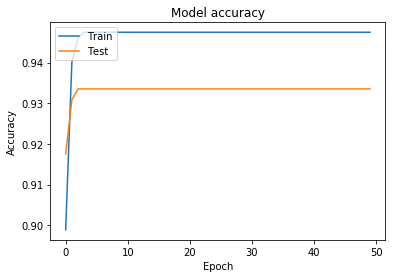

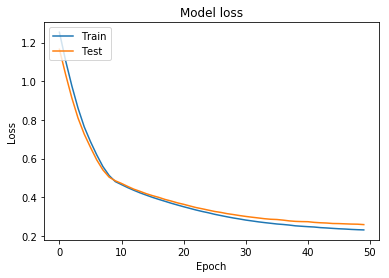

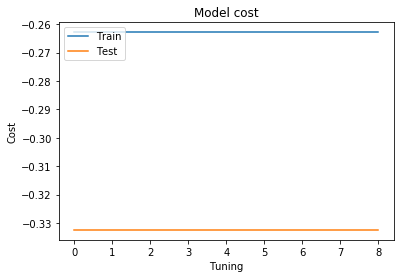

In [12]:
plt.plot(best_history.history['acc'])
plt.plot(best_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
            
            # Plot training & validation loss values
plt.plot(cost)
plt.plot(val_cost)
plt.title('Model cost')
plt.ylabel('Cost')
plt.xlabel('Tuning')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Neural network with 1 hidden layer and tuning

In [ ]:
from keras.layers import Dense, Dropout,Activation,BatchNormalization
from keras.optimizers import Adam
from keras.regularizers import l1_l2
cost=[]
val_cost=[]
num_iters = [50,500]#[500, 1000]
best_val = -100
regularization_strengths = [1e-1,1e1,1e2, 1e3, 1e4, 1e5]
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5]
hidden_layers= [2, 4, 8, 16, 32,64]
dropout =  [0.0,0.5]
for hid in hidden_layers:
    for dr in dropout:
        for l_rate in learning_rates:
            for r in regularization_strengths:
                for iterations in num_iters:
                    input_dim= x_train.shape[1]
                    reg = l1_l2(l1=r, l2=r)
                    model = Sequential()
                    model.add(Dense(hid, input_dim=input_dim, init='uniform',
                        W_regularizer=reg,
                        bias_regularizer=reg
                    ))
                    
                    model.add(BatchNormalization())
                    model.add(Activation('relu'))
                    model.add(Dropout(dr))

                    model.add(Dense(1, activation='sigmoid', input_dim=(hid,),
                       W_regularizer=reg,
                        bias_regularizer=reg
                    ))
                    
                    opt= Adam(lr=l_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
                    model.compile(optimizer= opt, loss='binary_crossentropy',metrics=['accuracy'])
                    history=model.fit(x_train, y_train, nb_epoch=iterations,  batch_size=256,validation_data=(x_holdout, y_holdout))
                   
                    y_pred = model.predict(x_holdout).astype(int)
                    validation_cost= my_custom_loss_func(y_holdout,y_pred)
                    val_cost.append(validation_cost)
            
                    y_pred = model.predict(x_train).astype(int)
                    train_cost= my_custom_loss_func(y_train,y_pred)
                    cost.append(train_cost)
            
                    if validation_cost > best_val:
                        best_cost= cost
                        best_val_cost = val_cost
                        best_history=history
                        best_reg=r
                        best_iter=iterations
                        best_lr=l_rate
                        best_val = validation_cost 
                        best_model = model
                        best_hid=hid
                        best_dr=dr



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=20, bias_regularizer=<keras.reg..., kernel_initializer="uniform", kernel_regularizer=<keras.reg...)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", input_dim=(2,), bias_regularizer=<keras.reg..., kernel_regularizer=<keras.reg...)`
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1503 samples, validate on 376 samples
Epoch 1/50
1503/1503 [==============================] - 1s 514us/step - loss: 0.8858 - acc: 0.7092 - val_loss: 0.8140 - val_acc: 0.6516
Epoch 2/50
1503/1503 [==============================] - 0s 11us/step - loss: 0.7905 - acc: 0.8736 - val_loss: 0.7672 - val_acc: 0.7606
Epoch 3/50
1503/1503 [==============================] - 0s 10us/step - loss: 0.7292 - acc: 0.9481 - val_loss: 0.6102 - val_acc: 0.9335
Epoch 4/50
1503/1503 [==============================] - 0s 10us/step - loss: 0.6944 - acc: 0.9474 - val_loss: 0.6291 - val_acc: 0.9335
Epoch 5/50
1503/1503 [==============================] - 0s 10us/step - loss: 0.6658 - acc: 0.9474 - val_loss: 0.6232 - val_acc: 0.9335
Epoch 6/50
1503/1503 [==============================] - 0s 9us/step - loss: 0.6389 - acc: 0.9474 - val_loss: 0.6477 - val_acc: 0.9335
Epoch 7/50
1503/1503 [==============================] - 0s 8us/step - loss: 0.6169 - acc: 0.9474 - val_loss: 0.6162 - val_acc: 0.9335
Epoch 8/5

1503/1503 [==============================] - 0s 9us/step - loss: 0.5657 - acc: 0.9474 - val_loss: 0.5877 - val_acc: 0.9335
Epoch 11/500
1503/1503 [==============================] - 0s 9us/step - loss: 0.5581 - acc: 0.9474 - val_loss: 0.5607 - val_acc: 0.9335
Epoch 12/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.5476 - acc: 0.9474 - val_loss: 0.5503 - val_acc: 0.9335
Epoch 13/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.5380 - acc: 0.9474 - val_loss: 0.5549 - val_acc: 0.9335
Epoch 14/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.5328 - acc: 0.9474 - val_loss: 0.5231 - val_acc: 0.9335
Epoch 15/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.5278 - acc: 0.9474 - val_loss: 0.5434 - val_acc: 0.9335
Epoch 16/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.5225 - acc: 0.9474 - val_loss: 0.5443 - val_acc: 0.9335
Epoch 17/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 8us/step - loss: 0.2793 - acc: 0.9481 - val_loss: 0.3081 - val_acc: 0.9335
Epoch 71/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2776 - acc: 0.9481 - val_loss: 0.3101 - val_acc: 0.9362
Epoch 72/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2761 - acc: 0.9474 - val_loss: 0.3025 - val_acc: 0.9335
Epoch 73/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2761 - acc: 0.9474 - val_loss: 0.3101 - val_acc: 0.9335
Epoch 74/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2744 - acc: 0.9474 - val_loss: 0.3019 - val_acc: 0.9335
Epoch 75/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2732 - acc: 0.9474 - val_loss: 0.3050 - val_acc: 0.9335
Epoch 76/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2716 - acc: 0.9474 - val_loss: 0.2957 - val_acc: 0.9335
Epoch 77/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 8us/step - loss: 0.2286 - acc: 0.9481 - val_loss: 0.2557 - val_acc: 0.9335
Epoch 131/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2289 - acc: 0.9488 - val_loss: 0.2467 - val_acc: 0.9335
Epoch 132/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2271 - acc: 0.9474 - val_loss: 0.2570 - val_acc: 0.9362
Epoch 133/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2280 - acc: 0.9508 - val_loss: 0.2533 - val_acc: 0.9335
Epoch 134/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2271 - acc: 0.9488 - val_loss: 0.2447 - val_acc: 0.9335
Epoch 135/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2275 - acc: 0.9494 - val_loss: 0.2466 - val_acc: 0.9335
Epoch 136/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2264 - acc: 0.9481 - val_loss: 0.2509 - val_acc: 0.9335
Epoch 137/500
1503/1503 [==============================

Epoch 190/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2049 - acc: 0.9501 - val_loss: 0.2371 - val_acc: 0.9335
Epoch 191/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2053 - acc: 0.9501 - val_loss: 0.2237 - val_acc: 0.9335
Epoch 192/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2033 - acc: 0.9514 - val_loss: 0.2247 - val_acc: 0.9335
Epoch 193/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2039 - acc: 0.9488 - val_loss: 0.2319 - val_acc: 0.9335
Epoch 194/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.2039 - acc: 0.9501 - val_loss: 0.2299 - val_acc: 0.9335
Epoch 195/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2034 - acc: 0.9481 - val_loss: 0.2230 - val_acc: 0.9335
Epoch 196/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.2023 - acc: 0.9488 - val_loss: 0.2263 - val_acc: 0.9335
Epoch 197/500
1503/1503 [================

Epoch 250/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1887 - acc: 0.9501 - val_loss: 0.2106 - val_acc: 0.9335
Epoch 251/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1896 - acc: 0.9521 - val_loss: 0.2131 - val_acc: 0.9335
Epoch 252/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1888 - acc: 0.9494 - val_loss: 0.2091 - val_acc: 0.9388
Epoch 253/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1890 - acc: 0.9508 - val_loss: 0.2159 - val_acc: 0.9362
Epoch 254/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1903 - acc: 0.9528 - val_loss: 0.2085 - val_acc: 0.9362
Epoch 255/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1882 - acc: 0.9508 - val_loss: 0.2135 - val_acc: 0.9388
Epoch 256/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1881 - acc: 0.9488 - val_loss: 0.2082 - val_acc: 0.9362
Epoch 257/500
1503/1503 [================

Epoch 310/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1809 - acc: 0.9548 - val_loss: 0.2112 - val_acc: 0.9335
Epoch 311/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1795 - acc: 0.9514 - val_loss: 0.2048 - val_acc: 0.9335
Epoch 312/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1801 - acc: 0.9488 - val_loss: 0.2072 - val_acc: 0.9335
Epoch 313/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1809 - acc: 0.9508 - val_loss: 0.1972 - val_acc: 0.9335
Epoch 314/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1791 - acc: 0.9528 - val_loss: 0.2052 - val_acc: 0.9388
Epoch 315/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1795 - acc: 0.9514 - val_loss: 0.1966 - val_acc: 0.9335
Epoch 316/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1804 - acc: 0.9514 - val_loss: 0.1979 - val_acc: 0.9362
Epoch 317/500
1503/1503 [================

Epoch 370/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1705 - acc: 0.9508 - val_loss: 0.1902 - val_acc: 0.9415
Epoch 371/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1704 - acc: 0.9548 - val_loss: 0.1941 - val_acc: 0.9335
Epoch 372/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1711 - acc: 0.9541 - val_loss: 0.1929 - val_acc: 0.9335
Epoch 373/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1708 - acc: 0.9548 - val_loss: 0.1970 - val_acc: 0.9335
Epoch 374/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1694 - acc: 0.9528 - val_loss: 0.1915 - val_acc: 0.9335
Epoch 375/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1684 - acc: 0.9521 - val_loss: 0.1966 - val_acc: 0.9335
Epoch 376/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1702 - acc: 0.9541 - val_loss: 0.1913 - val_acc: 0.9335
Epoch 377/500
1503/1503 [================

Epoch 430/500
1503/1503 [==============================] - 0s 9us/step - loss: 0.1624 - acc: 0.9568 - val_loss: 0.1819 - val_acc: 0.9335
Epoch 431/500
1503/1503 [==============================] - 0s 9us/step - loss: 0.1633 - acc: 0.9488 - val_loss: 0.1820 - val_acc: 0.9415
Epoch 432/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1634 - acc: 0.9548 - val_loss: 0.1835 - val_acc: 0.9335
Epoch 433/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1630 - acc: 0.9508 - val_loss: 0.1942 - val_acc: 0.9707
Epoch 434/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1623 - acc: 0.9561 - val_loss: 0.1796 - val_acc: 0.9521
Epoch 435/500
1503/1503 [==============================] - 0s 9us/step - loss: 0.1636 - acc: 0.9508 - val_loss: 0.1888 - val_acc: 0.9335
Epoch 436/500
1503/1503 [==============================] - 0s 9us/step - loss: 0.1648 - acc: 0.9474 - val_loss: 0.1933 - val_acc: 0.9707
Epoch 437/500
1503/1503 [================

Epoch 490/500
1503/1503 [==============================] - 0s 9us/step - loss: 0.1619 - acc: 0.9528 - val_loss: 0.1790 - val_acc: 0.9335
Epoch 491/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1589 - acc: 0.9481 - val_loss: 0.1806 - val_acc: 0.9335
Epoch 492/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1570 - acc: 0.9554 - val_loss: 0.1775 - val_acc: 0.9548
Epoch 493/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1578 - acc: 0.9574 - val_loss: 0.1787 - val_acc: 0.9362
Epoch 494/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1588 - acc: 0.9541 - val_loss: 0.1760 - val_acc: 0.9495
Epoch 495/500
1503/1503 [==============================] - 0s 7us/step - loss: 0.1589 - acc: 0.9521 - val_loss: 0.1757 - val_acc: 0.9335
Epoch 496/500
1503/1503 [==============================] - 0s 8us/step - loss: 0.1586 - acc: 0.9481 - val_loss: 0.1768 - val_acc: 0.9335
Epoch 497/500
1503/1503 [================

Epoch 50/50
1503/1503 [==============================] - 0s 7us/step - loss: 1.3018 - acc: 0.6733 - val_loss: 1.2719 - val_acc: 0.0665
[[351   0]
 [ 25   0]]
[[1424    0]
 [  79    0]]
Train on 1503 samples, validate on 376 samples
Epoch 1/500
1503/1503 [==============================] - 1s 715us/step - loss: 24.8814 - acc: 0.3174 - val_loss: 22.0698 - val_acc: 0.0665
Epoch 2/500
1503/1503 [==============================] - 0s 13us/step - loss: 20.7414 - acc: 0.4864 - val_loss: 18.3328 - val_acc: 0.0665
Epoch 3/500
1503/1503 [==============================] - 0s 8us/step - loss: 17.8574 - acc: 0.2794 - val_loss: 16.6962 - val_acc: 0.9335
Epoch 4/500
1503/1503 [==============================] - 0s 8us/step - loss: 15.9590 - acc: 0.7864 - val_loss: 14.8708 - val_acc: 0.0665
Epoch 5/500
1503/1503 [==============================] - 0s 9us/step - loss: 14.1727 - acc: 0.3327 - val_loss: 13.2157 - val_acc: 0.9335
Epoch 6/500
1503/1503 [==============================] - 0s 9us/step - loss: 12.

1503/1503 [==============================] - 0s 9us/step - loss: 1.2878 - acc: 0.5017 - val_loss: 1.2363 - val_acc: 0.9335
Epoch 60/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2779 - acc: 0.3460 - val_loss: 1.2417 - val_acc: 0.9335
Epoch 61/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.3137 - acc: 0.5156 - val_loss: 1.2526 - val_acc: 0.9335
Epoch 62/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2805 - acc: 0.5023 - val_loss: 1.1405 - val_acc: 0.9335
Epoch 63/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2323 - acc: 0.6221 - val_loss: 1.2409 - val_acc: 0.7766
Epoch 64/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2762 - acc: 0.4731 - val_loss: 1.2551 - val_acc: 0.0665
Epoch 65/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2950 - acc: 0.5010 - val_loss: 1.2942 - val_acc: 0.0665
Epoch 66/500
1503/1503 [==============================] - 0s 

1503/1503 [==============================] - 0s 9us/step - loss: 1.2704 - acc: 0.6427 - val_loss: 1.2611 - val_acc: 0.0665
Epoch 120/500
1503/1503 [==============================] - 0s 10us/step - loss: 1.2434 - acc: 0.3613 - val_loss: 1.2590 - val_acc: 0.9335
Epoch 121/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2999 - acc: 0.5156 - val_loss: 1.2904 - val_acc: 0.9335
Epoch 122/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.3013 - acc: 0.5116 - val_loss: 1.1346 - val_acc: 0.9335
Epoch 123/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2543 - acc: 0.6540 - val_loss: 1.1895 - val_acc: 0.0665
Epoch 124/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2854 - acc: 0.6440 - val_loss: 1.2205 - val_acc: 0.0665
Epoch 125/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2853 - acc: 0.4857 - val_loss: 1.2864 - val_acc: 0.0665
Epoch 126/500
1503/1503 [=============================

Epoch 179/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.3054 - acc: 0.5130 - val_loss: 1.2168 - val_acc: 0.0665
Epoch 180/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2773 - acc: 0.7059 - val_loss: 1.2344 - val_acc: 0.0665
Epoch 181/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2880 - acc: 0.5116 - val_loss: 1.2955 - val_acc: 0.0665
Epoch 182/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.3103 - acc: 0.5556 - val_loss: 1.1968 - val_acc: 0.0665
Epoch 183/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2578 - acc: 0.3446 - val_loss: 1.2526 - val_acc: 0.9335
Epoch 184/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2749 - acc: 0.4937 - val_loss: 1.2696 - val_acc: 0.9335
Epoch 185/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2957 - acc: 0.4950 - val_loss: 1.2587 - val_acc: 0.9335
Epoch 186/500
1503/1503 [================

Epoch 239/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2977 - acc: 0.4910 - val_loss: 1.2771 - val_acc: 0.9335
Epoch 240/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2510 - acc: 0.4857 - val_loss: 1.2417 - val_acc: 0.9335
Epoch 241/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2864 - acc: 0.4857 - val_loss: 1.2522 - val_acc: 0.9335
Epoch 242/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2943 - acc: 0.5156 - val_loss: 1.1281 - val_acc: 0.0665
Epoch 243/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2617 - acc: 0.4923 - val_loss: 1.2441 - val_acc: 0.9335
Epoch 244/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2839 - acc: 0.4870 - val_loss: 1.2556 - val_acc: 0.9335
Epoch 245/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2787 - acc: 0.4897 - val_loss: 1.2932 - val_acc: 0.9335
Epoch 246/500
1503/1503 [================

Epoch 299/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.3100 - acc: 0.6381 - val_loss: 1.2646 - val_acc: 0.9335
Epoch 300/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2651 - acc: 0.4824 - val_loss: 1.2391 - val_acc: 0.9335
Epoch 301/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2849 - acc: 0.4844 - val_loss: 1.2902 - val_acc: 0.9335
Epoch 302/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.2913 - acc: 0.3586 - val_loss: 1.1824 - val_acc: 0.9335
Epoch 303/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2685 - acc: 0.6593 - val_loss: 1.2776 - val_acc: 0.0665
Epoch 304/500
1503/1503 [==============================] - 0s 9us/step - loss: 1.3043 - acc: 0.5183 - val_loss: 1.2286 - val_acc: 0.0665
Epoch 305/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.3023 - acc: 0.6640 - val_loss: 1.2397 - val_acc: 0.0665
Epoch 306/500
1503/1503 [================

Epoch 359/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2950 - acc: 0.5143 - val_loss: 1.2896 - val_acc: 0.9335
Epoch 360/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2684 - acc: 0.5143 - val_loss: 1.2279 - val_acc: 0.9335
Epoch 361/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2949 - acc: 0.6620 - val_loss: 1.2219 - val_acc: 0.0665
Epoch 362/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2867 - acc: 0.6294 - val_loss: 1.1222 - val_acc: 0.0665
Epoch 363/500
1503/1503 [==============================] - 0s 7us/step - loss: 1.2381 - acc: 0.4963 - val_loss: 1.2507 - val_acc: 0.0665
Epoch 364/500
1503/1503 [==============================] - 0s 7us/step - loss: 1.2952 - acc: 0.4910 - val_loss: 1.2795 - val_acc: 0.0665
Epoch 365/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2993 - acc: 0.3626 - val_loss: 1.2860 - val_acc: 0.9335
Epoch 366/500
1503/1503 [================

Epoch 419/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2910 - acc: 0.4251 - val_loss: 1.3190 - val_acc: 0.0665
Epoch 420/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2880 - acc: 0.5256 - val_loss: 1.2767 - val_acc: 0.0665
Epoch 421/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2897 - acc: 0.4910 - val_loss: 1.2779 - val_acc: 0.9335
Epoch 422/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2791 - acc: 0.7259 - val_loss: 1.1776 - val_acc: 0.0665
Epoch 423/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2566 - acc: 0.4591 - val_loss: 1.2540 - val_acc: 0.8750
Epoch 424/500
1503/1503 [==============================] - 0s 7us/step - loss: 1.3152 - acc: 0.6347 - val_loss: 1.2226 - val_acc: 0.9335
Epoch 425/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.3196 - acc: 0.3433 - val_loss: 1.2924 - val_acc: 0.9335
Epoch 426/500
1503/1503 [================

Epoch 479/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2820 - acc: 0.5077 - val_loss: 1.2429 - val_acc: 0.0665
Epoch 480/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2818 - acc: 0.6381 - val_loss: 1.2400 - val_acc: 0.0665
Epoch 481/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.3366 - acc: 0.3852 - val_loss: 1.2883 - val_acc: 0.9335
Epoch 482/500
1503/1503 [==============================] - 0s 7us/step - loss: 1.2946 - acc: 0.5083 - val_loss: 1.1485 - val_acc: 0.9335
Epoch 483/500
1503/1503 [==============================] - 0s 7us/step - loss: 1.2437 - acc: 0.4750 - val_loss: 1.2526 - val_acc: 0.9335
Epoch 484/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2805 - acc: 0.5090 - val_loss: 1.2693 - val_acc: 0.0665
Epoch 485/500
1503/1503 [==============================] - 0s 8us/step - loss: 1.2995 - acc: 0.6620 - val_loss: 1.3076 - val_acc: 0.0665
Epoch 486/500
1503/1503 [================

1503/1503 [==============================] - 0s 8us/step - loss: 6.2410 - acc: 0.3353 - val_loss: 6.5076 - val_acc: 0.0931
Epoch 39/50
1503/1503 [==============================] - 0s 8us/step - loss: 6.5463 - acc: 0.3713 - val_loss: 6.3445 - val_acc: 0.9335
Epoch 40/50
1503/1503 [==============================] - 0s 8us/step - loss: 6.5862 - acc: 0.5190 - val_loss: 6.4243 - val_acc: 0.0665
Epoch 41/50
1503/1503 [==============================] - 0s 7us/step - loss: 6.2908 - acc: 0.6307 - val_loss: 6.5858 - val_acc: 0.9335
Epoch 42/50
1503/1503 [==============================] - 0s 8us/step - loss: 6.1700 - acc: 0.5808 - val_loss: 6.6805 - val_acc: 0.9335
Epoch 43/50
1503/1503 [==============================] - 0s 8us/step - loss: 6.3275 - acc: 0.8716 - val_loss: 7.2159 - val_acc: 0.0665
Epoch 44/50
1503/1503 [==============================] - 0s 8us/step - loss: 6.1916 - acc: 0.4923 - val_loss: 6.6707 - val_acc: 0.9335
Epoch 45/50
1503/1503 [==============================] - 0s 7us/ste

1503/1503 [==============================] - 0s 8us/step - loss: 6.9496 - acc: 0.6554 - val_loss: 7.1210 - val_acc: 0.0665
Epoch 48/500
1503/1503 [==============================] - 0s 9us/step - loss: 7.5256 - acc: 0.3407 - val_loss: 6.4487 - val_acc: 0.9335
Epoch 49/500
1503/1503 [==============================] - 0s 8us/step - loss: 7.1103 - acc: 0.3945 - val_loss: 6.9829 - val_acc: 0.8883
Epoch 50/500
1503/1503 [==============================] - 0s 8us/step - loss: 7.0118 - acc: 0.4884 - val_loss: 6.4863 - val_acc: 0.9335
Epoch 51/500
1503/1503 [==============================] - 0s 8us/step - loss: 7.3119 - acc: 0.2349 - val_loss: 7.2457 - val_acc: 0.0665
Epoch 52/500
1503/1503 [==============================] - 0s 8us/step - loss: 7.3157 - acc: 0.5908 - val_loss: 5.2183 - val_acc: 0.0665
Epoch 53/500
1503/1503 [==============================] - 0s 8us/step - loss: 6.7480 - acc: 0.3912 - val_loss: 6.6323 - val_acc: 0.0665
Epoch 54/500
1503/1503 [==============================] - 0s 

In [ ]:
best_reg, best_iter, best_lr, best_val,best_hid,best_dr

In [ ]:
plt.plot(best_history.history['acc'])
plt.plot(best_history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
            
            # Plot training & validation loss values
plt.plot(cost)
plt.plot(val_cost)
plt.title('Model cost')
plt.ylabel('Monetary value')
plt.xlabel('Hyper-tuning parameters combination')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()